In [1]:
path_to_zip_file='/content/drive/MyDrive/Asad data/time series data/air_dataset.zip'
directory_to_extract_to='/content/drive/MyDrive/Asad data/time series data/unzipped'

In [2]:
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [11]:
dataframe=pd.read_csv('/content/drive/MyDrive/Asad data/time series data/unzipped/AirPassengers.csv',usecols=[1])

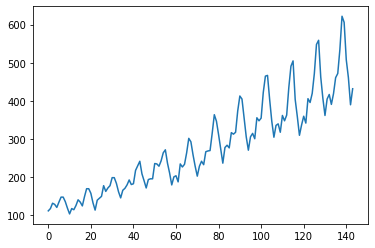

In [15]:
plt.plot(dataframe)

In [16]:
df.head(5)

,#Passengers
0,112
1,118
2,132
3,129
4,121


In [17]:
dataset=dataframe.values

In [19]:
dataset=dataset.astype('float32')

In [22]:
type(dataset)

numpy.ndarray

In [23]:
scalar=MinMaxScaler(feature_range=(0,1))

In [24]:
dataset=scalar.fit_transform(dataset)

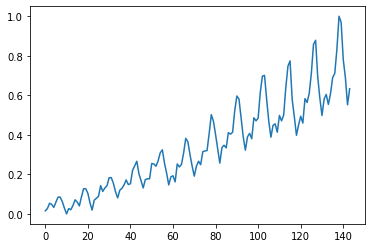

In [25]:
plt.plot(dataset)

In [26]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [50]:

def to_sequences(dataset, seq_size):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [51]:
seq_size = 10 # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [53]:
trainX.shape,trainY.shape

((84, 10), (84,))

In [56]:
model=Sequential()
model.add(Dense(64,input_dim=10,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['acc'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
3/3 - 2s - loss: 0.0507 - acc: 0.0119 - val_loss: 0.1970 - val_acc: 0.0000e+00 - 2s/epoch - 754ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0297 - acc: 0.0119 - val_loss: 0.1066 - val_acc: 0.0000e+00 - 34ms/epoch - 11ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0151 - acc: 0.0119 - val_loss: 0.0500 - val_acc: 0.0000e+00 - 37ms/epoch - 12ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0073 - acc: 0.0119 - val_loss: 0.0253 - val_acc: 0.0263 - 32ms/epoch - 11ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0052 - acc: 0.0119 - val_loss: 0.0236 - val_acc: 0.0263 - 32ms/epoch - 11ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0064 - acc: 0.0119 - val_loss: 0.0266 - val_acc: 0.0263 - 32ms/epoch - 11ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0070 - acc: 0.0119 - val_loss: 0.0247 - val_acc: 0.0263 - 35ms/epoch - 12ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0061 - acc: 0.0119 - val_loss: 0.0207 - val_acc: 0.0263 - 31ms/epoch - 10ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0048 - acc: 0.0119 - val_loss: 0.0190 - val_acc: 0.0263 - 33ms

In [61]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [62]:
trainPredict = scalar.inverse_transform(trainPredict)
trainY_inverse = scalar.inverse_transform([trainY])
testPredict = scalar.inverse_transform(testPredict)
testY_inverse = scalar.inverse_transform([testY])

In [63]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 13.97 RMSE
Test Score: 27.95 RMSE


In [64]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict


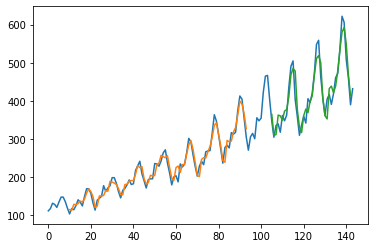

In [66]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scalar.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()